<a href="https://colab.research.google.com/github/AnshulPratap26/Student_mark_prediction/blob/main/Task1_the_sparks_foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student marks prediction Project
Auther : Anshul Pratap 

Data Science and Business Analytics internship at The Spark Foundation

# Simple Linear Regression Task


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
Also task is to predict How many score a student will get after studying 9.25 hours.

In [1]:
#importing necessary libraries
import pandas as pd     #pandas module for reading data and manipulation
import numpy as np      #numpy is for mathematical calculations
import matplotlib.pyplot as plt  #matplotlib library for plotting graphs

In [2]:
#rading data from excel file using pandas
data = pd.read_excel('/content/student study dataset.xlsx')

## Data Preprocessing Starts here

In [3]:
#for looking at few rows of dataset
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#checking shape of data
data.shape 

(25, 2)

In [5]:
data.info() #info funtion to gather some information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


plotting graph to check the relation between Scores and Hours

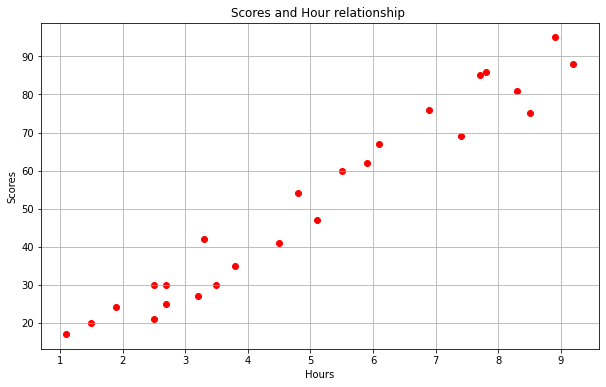

In [26]:
#scatter graph to check relation between attributes

plt.figure(figsize=(10,6))
plt.grid()
plt.scatter(x=data.Hours,y=data.Scores,c='red')
plt.xlabel("Hours")
plt.ylabel('Scores')
plt.title('Scores and Hour relationship ')
plt.show()

In [7]:
# checking any missing values in dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

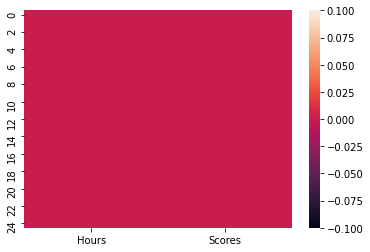

In [8]:
# ploting heat graph 
import seaborn as sns
sns.heatmap(data.isnull())

# Splitting dataset into features and label 
####then splitting features and labels into training and validation set

In [9]:
# splitting dataset into label and feature 
X = data.iloc[:,0].values
Y= data.iloc[:,1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train , x_test , Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

# Building model to predict the values

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1,1),Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

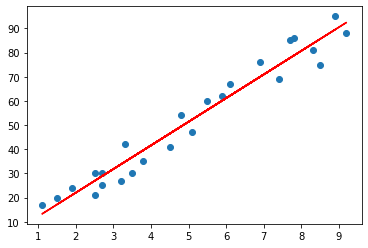

In [32]:
# Plotting the regression line
slope = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, slope, c='red')
plt.show()

## Predicting values

In [13]:
y_pred = model.predict(x_test.reshape(-1,1))


array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [38]:
# print(y_test[:5])
# print(y_pred[:5])
print('Actual values and Predicted values \n')
for i in zip(y_test[:5],y_pred[:5]):
  print(i)

Actual values and Predicted values 

(20, 17.147378491554413)
(27, 33.76624425589311)
(69, 74.82461849720048)
(30, 26.92318188234188)
(62, 60.16091341101927)


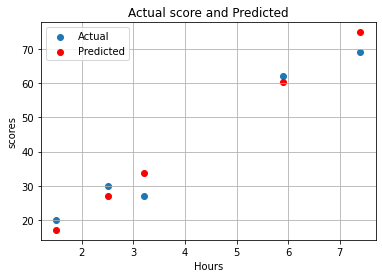

In [28]:
# plotting graph to show Actual and predicted values

plt.grid()
plt.scatter(x_test, y_test,label='Actual')
plt.scatter(x_test,y_pred,c='red',label='Predicted')
plt.xlabel('Hours')
plt.ylabel('scores')
plt.title('Actual score and Predicted')
plt.legend()
plt.show()

## model accuracy 

In [16]:
model.score(x_test.reshape(-1,1), y_test)

0.9491748734859172

## Calculating Root mean square Error 

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse} \n RMSE : {rmse}")

MSE: 20.138948129940175 
 RMSE : 4.487643939746131


# ** predicting study hours about 9.25 

If any student will study about 9.25 hours he will get nearly 92.90 Scores in exams

In [18]:
# print(f'The marks will obtain by studying 9.25 hours : {model.predict([[9.25]])[0]}')
print(f" No. of study Hours : 9.25  \n",
      f"Marks will get : {model.predict([[9.25]])[0]}")

 No. of study Hours : 9.25  
 Marks will get : 92.9098547701573
